# Logistic Regression 

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.datasets import make_blobs

from matplotlib import pyplot
import matplotlib.cm as cm
from random import sample

## Generating Some Example Data with 2 Features

In [2]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n=1000 # the number of total samples

In [3]:
# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
X, y = make_blobs(n_samples=n, # the number of total samples
                  centers=n_components, # the number of clusters
                  n_features=n_feature, # the number of features
                  cluster_std = [3] * n_components, # the std of each cluster
                  random_state=2) # 2

X

array([[  1.72867551,  -5.9553972 ],
       [ -1.21631941,  -6.74872282],
       [ -0.03779071, -12.55044002],
       ...,
       [ -0.98160416, -16.69415352],
       [ -2.4399793 , -12.13520847],
       [ -0.44559321,  -5.97957498]])

In [4]:
# Just to show you what is inside it. We print the first 10 elements of this numpy array. 
y[:10]

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

## Visualizing our example data

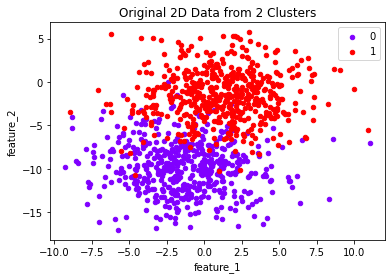

In [5]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

# Separate the data into Training and Test dataset 

In [6]:

# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
## Building and Training a Logistic Regression Model 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,y_train)



y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.945


## Classification Report

In [9]:
from sklearn.metrics import classification_report



print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       109
           1       0.98      0.90      0.94        91

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

